<a href="https://colab.research.google.com/github/araujoheloysa/DIO_BairesDev_Machine-Learning-Practitioner/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o_por_Imagens_com_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Connecting to Google Drive and downloading the dataset




In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%%writefile kaggle.json
{"username":"x","key":"x"}

Writing kaggle.json


In [3]:
!pip install -q -U kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=fa3ab9cc8ee3d686ef51db137e421979979fb4cd77ea906b2b341013290af293
  Stored in directory: /root/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [4]:
# downloading raw images from kaggle
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
!unzip fashion-product-images-small.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: myntradataset/images/5813.jpg  
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradatas

# 2. Creating directory

In [5]:
import pandas as pd
import random
import shutil
from shutil import move
import os
from tqdm import tqdm

# Check if directory exists before creating it
if not os.path.exists('/content/Fashion_data'):
    os.mkdir('/content/Fashion_data')

os.chdir('/content/Fashion_data')

df = pd.read_csv('/content/styles.csv', usecols=['id','articleType']).reset_index()
df['id'] = df['id'].astype('str')

all_images = os.listdir('/content/images/')
co = 0

# Check if directory exists before creating it
if not os.path.exists('/content/Fashion_data/categories'):
    os.mkdir('/content/Fashion_data/categories')



In [6]:
# Saving images from 4 categories
for image in tqdm(all_images):
    category = df[df['id'] == image.split('.')[0]]['articleType']
    category = str(list(category)[0])
    allowed_category = ['Shirts','Watches','Jeans',"Sports Shoes"]
    if category not in allowed_category:
        continue
        category = str(list(category)[0])
    if not os.path.exists(os.path.join('/content/Fashion_data/categories', category)):
        os.mkdir(os.path.join('/content/Fashion_data/categories', category))
    path_from = os.path.join('/content/images', image)
    path_to = os.path.join('/content/Fashion_data/categories', category, image)
    move(path_from, path_to)
    co += 1
print('Moved {} images.'.format(co))

100%|██████████| 44441/44441 [03:57<00:00, 187.06it/s]

Moved 8401 images.


# 3. Feature extraction with a reduced number of images

In [7]:
source_dir = '/content/Fashion_data/categories'
destination_dir = '/content/imgs/'
max_images_per_category = 100

os.makedirs(destination_dir, exist_ok=True)

for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)

    if not os.path.isdir(category_path):
        continue

    images = [img for img in os.listdir(category_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Randomly select up to 500 images
    selected_images = random.sample(images, min(len(images), max_images_per_category))

    # Create subdirectory in destination
    destination_category_path = os.path.join(destination_dir, category)
    os.makedirs(destination_category_path, exist_ok=True)

    # Move selected images
    for image in selected_images:
        shutil.move(os.path.join(category_path, image), os.path.join(destination_category_path, image))

    print(f"Movidas {len(selected_images)} imagens da categoria {category}.")

print("Processo concluído!")


Movidas 100 imagens da categoria Watches.
Movidas 100 imagens da categoria Jeans.
Movidas 100 imagens da categoria Sports Shoes.
Movidas 100 imagens da categoria Shirts.
Processo concluído!


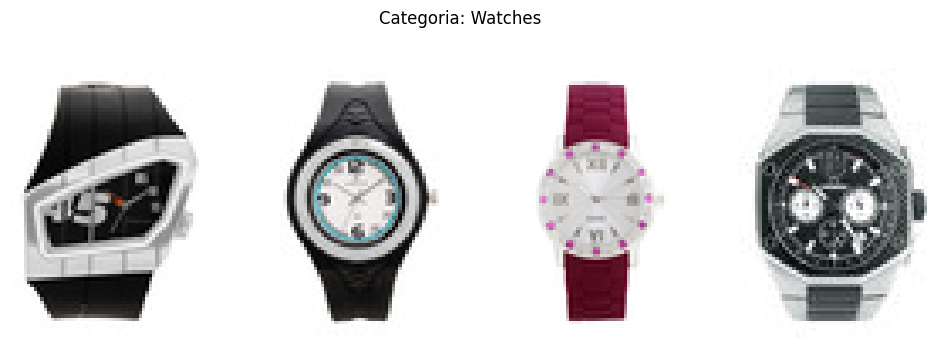

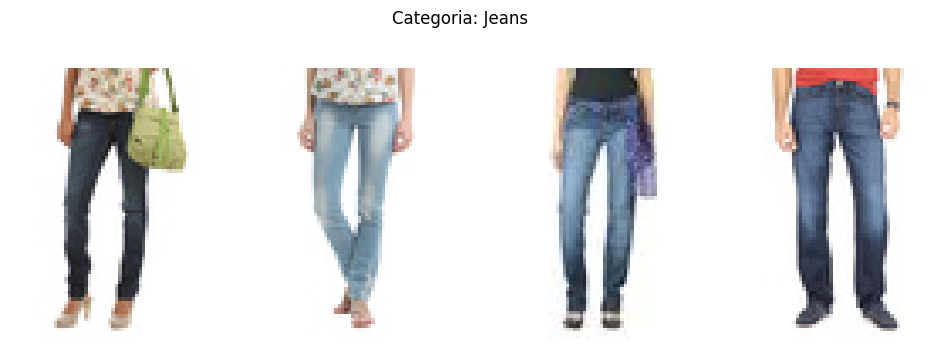

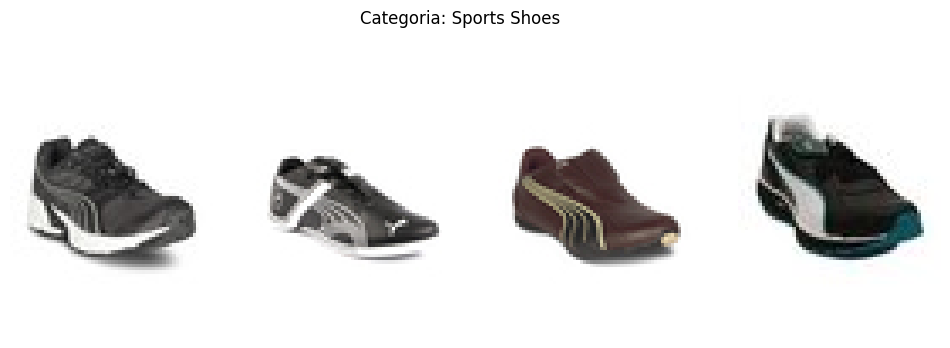

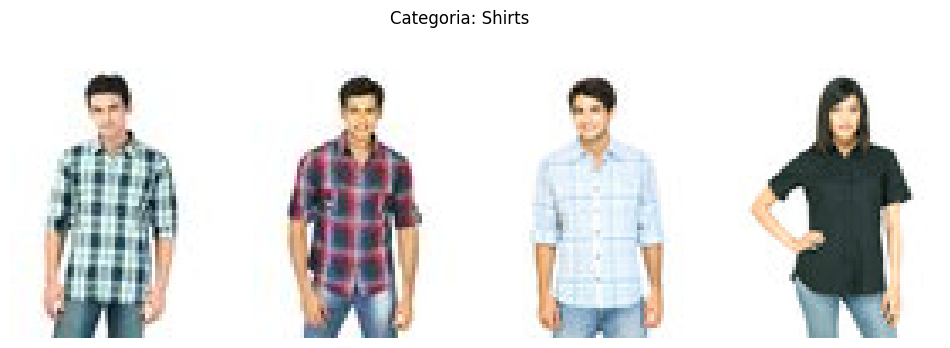

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

destination_dir = '/content/imgs/'

for category in os.listdir(destination_dir):
    category_path = os.path.join(destination_dir, category)

    if not os.path.isdir(category_path):
        continue

    images = [img for img in os.listdir(category_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    selected_images = random.sample(images, min(4, len(images)))

    fig, axes = plt.subplots(1, len(selected_images), figsize=(12, 4))
    fig.suptitle(f'Categoria: {category}')

    for ax, image in zip(axes, selected_images):
        img_path = os.path.join(category_path, image)
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')

    plt.show()

In [9]:
import itertools
import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.18.0
Hub version: 0.16.1
GPU is NOT AVAILABLE


# 4. Loading the VGG16 model

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors

# Load pre-trained model (without final layer)
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# Function for extracting image characteristics
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    features = model.predict(img_data)
    return features.flatten()

# Directory with the dataset images
image_dir = "/content/imgs/"

# Lists for storing paths and feature vectors
image_paths = []
image_vectors = []

# Browse all subfolders within `image_dir`
for root, _, files in os.walk(image_dir):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            features = extract_features(img_path, model)
            image_paths.append(img_path)
            image_vectors.append(features)

image_vectors = np.array(image_vectors)

np.save('image_vectors.npy', image_vectors)
np.save('image_paths.npy', image_paths)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

# 5. Similar image search with KNN

In [12]:

def find_similar_images(query_image_path, image_vectors, image_paths, top_n=5):
    query_vector = extract_features(query_image_path, model).reshape(1, -1)

    # KNN to find the most similar ones
    knn = NearestNeighbors(n_neighbors=top_n, metric='cosine')
    knn.fit(image_vectors)
    distances, indices = knn.kneighbors(query_vector)

    # Return the paths of the most similar images
    similar_images = [image_paths[idx] for idx in indices.flatten()]
    return similar_images

# Function for showing images
def show_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        plt.subplot(1, len(image_paths), i + 1)
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


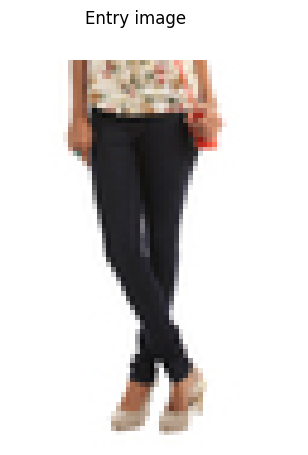

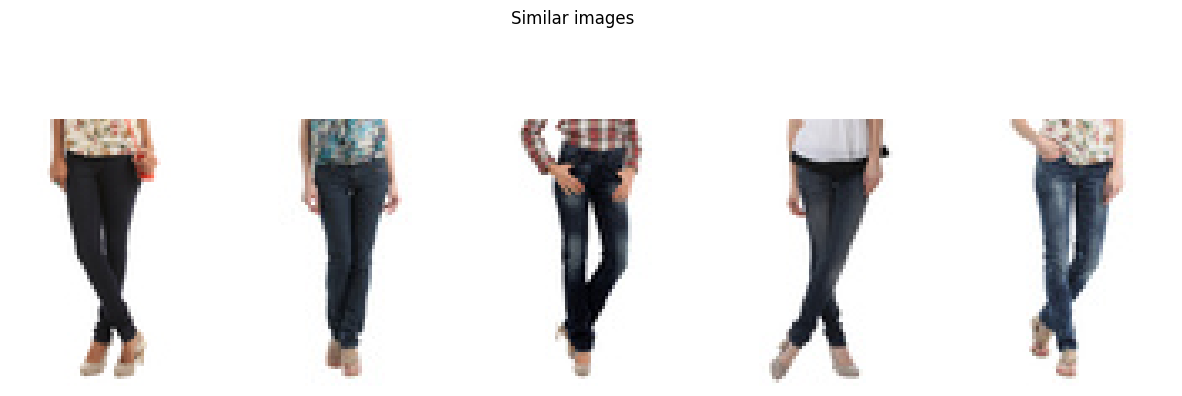

In [15]:
query_image = "/content/imgs/Jeans/50944.jpg" # Updated path to reflect the location after moving the images
similar_images = find_similar_images(query_image, image_vectors, image_paths)

show_images([query_image], "Entry image")
show_images(similar_images, "Similar images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step


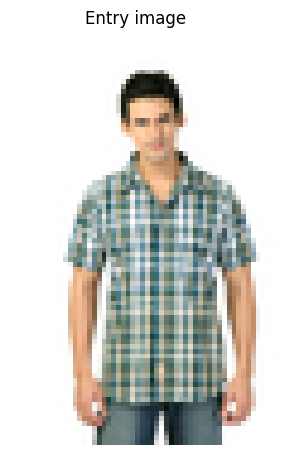

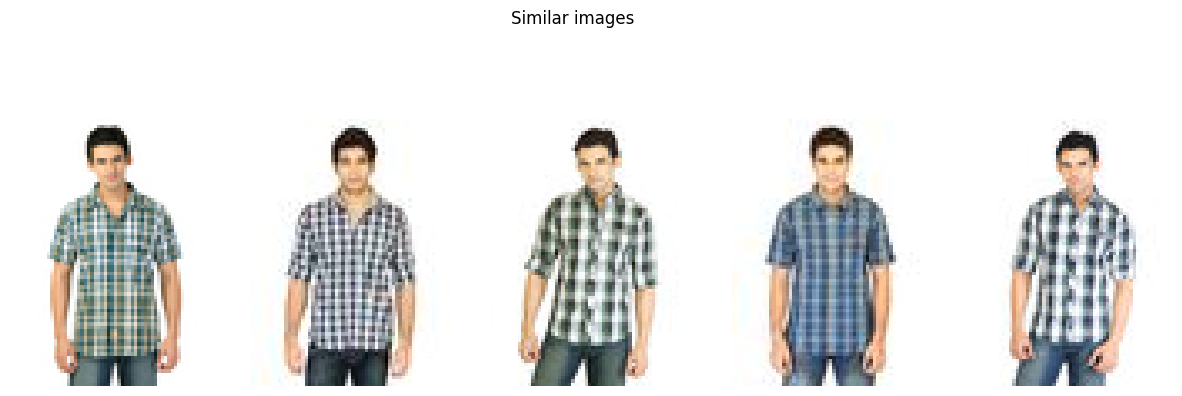

In [16]:
query_image = "/content/imgs/Shirts/12176.jpg"
similar_images = find_similar_images(query_image, image_vectors, image_paths)

show_images([query_image], "Entry image")
show_images(similar_images, "Similar images")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


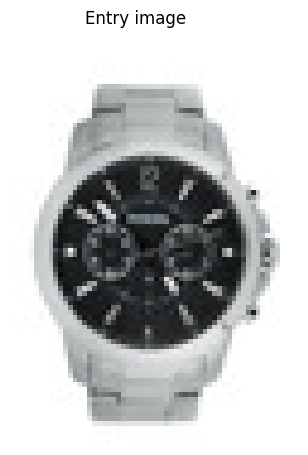

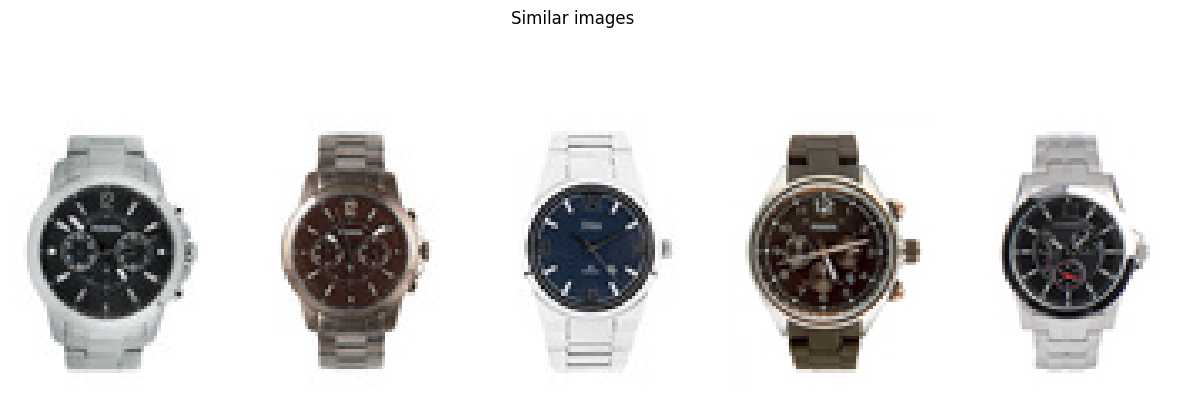

In [18]:
query_image = "/content/imgs/Watches/29751.jpg"
similar_images = find_similar_images(query_image, image_vectors, image_paths)

show_images([query_image], "Entry image")
show_images(similar_images, "Similar images")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


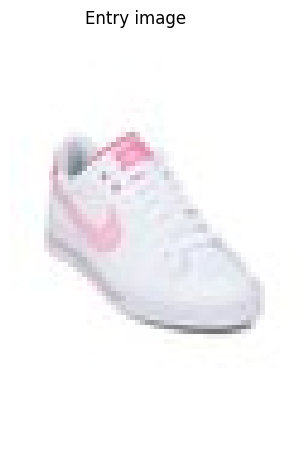

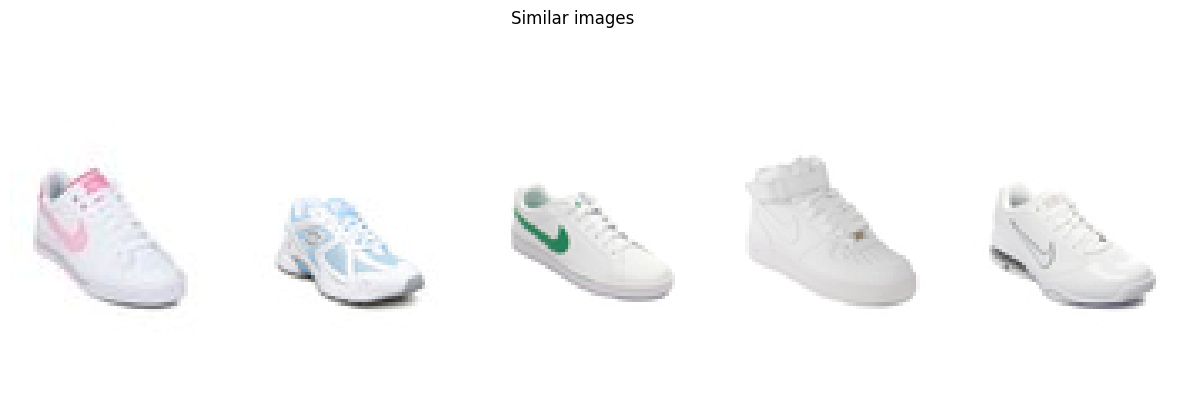

In [19]:
query_image = "/content/imgs/Sports Shoes/3212.jpg"
similar_images = find_similar_images(query_image, image_vectors, image_paths)

show_images([query_image], "Entry image")
show_images(similar_images, "Similar images")
